# Introdução

### Segmentação RFM

Essa segmentação de clientes é baseada em três diferentes variáveis, Recência, Frequência e Monetização...
Através de três atributos diferentes (data da compra, ID do cliente e Valor da Compra) são calculadas a data da última compra(Recência) a quantidade de compras(frequência) e o valor total gasto(Monetização)..
Através destes é possível dar notas para os clientes calculadas sobre a distribuição desses valores...
O resultado final é uma segmentação flexível que pode ser adaptada de acordo com o negócio em questão...
Ao final há um gráfico de barras com sugestões de segmentação ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 18,8

In [2]:
sales = pd.read_csv("Electronic_sales.csv")
sales

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [3]:
print(sales.dtypes)

Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object


In [4]:
filtered = sales[["Customer ID", "Total Price", "Purchase Date" ]]
filtered

,Customer ID,Total Price,Purchase Date
0,1000,5538.33,2024-03-20
1,1000,741.09,2024-04-20
2,1002,1855.84,2023-10-17
3,1002,3164.76,2024-08-09
4,1003,41.50,2024-05-21
...,...,...,...
19995,19996,6838.08,2024-06-15
19996,19996,2697.28,2024-07-18
19997,19996,1805.90,2024-08-26
19998,19997,2528.26,2024-01-06


In [5]:
filtered.isnull().sum()

Customer ID      0
Total Price      0
Purchase Date    0
dtype: int64

In [6]:
df_cancel = sales[sales["Order Status"] != "Completed"]
df_cancel

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
8,1006,24,Male,No,Smartphone,SKU1004,2,Cancelled,Debit Card,5538.33,791.19,7,2023-10-03,Standard,Impulse Item,43.05
11,1007,35,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,7120.71,791.19,9,2023-11-07,Overnight,"Accessory,Extended Warranty",55.48
14,1013,42,Female,No,Smartphone,SKU1004,2,Cancelled,Paypal,5538.33,791.19,7,2024-03-18,Overnight,"Accessory,Impulse Item,Accessory",57.81
15,1014,73,Female,No,Smartwatch,SKU1003,3,Cancelled,Credit Card,5068.98,844.83,6,2024-01-02,Standard,"Extended Warranty,Extended Warranty",69.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,19994,64,Male,No,Tablet,TBL345,4,Cancelled,Bank Transfer,5504.87,786.41,7,2024-06-12,Expedited,"Accessory, Extended Warranty",93.17
19992,19996,27,Female,Yes,Smartphone,SMP234,4,Cancelled,PayPal,4558.72,1139.68,4,2024-01-24,Same Day,Extended Warranty,65.94
19993,19996,27,Female,No,Smartphone,SMP234,1,Cancelled,PayPal,7977.76,1139.68,7,2024-04-11,Expedited,"Extended Warranty, Extended Warranty, Impulse ...",167.20
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00


## Alguns Gráficos

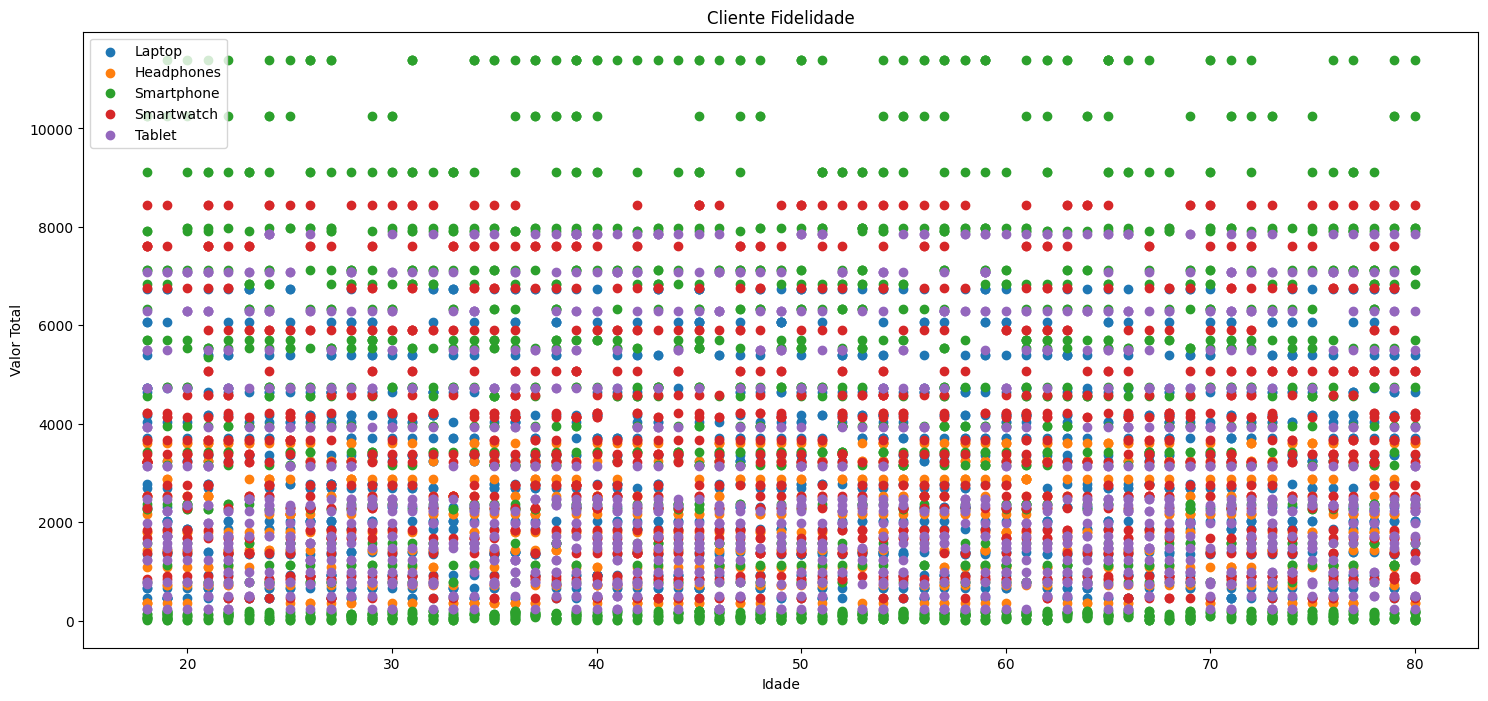

In [7]:
unicos = list(set(df_cancel["Product Type"]))
x = df_cancel["Age"]
y = df_cancel["Total Price"]
for i in range(len(unicos)):
    indice = df_cancel["Product Type"] == unicos[i]
    plt.scatter(x[indice], y[indice], label = unicos[i], )
plt.title("Cliente Fidelidade")
plt.xlabel("Idade")
plt.ylabel("Valor Total")
plt.legend(loc = "upper left")
plt.show()

Text(0.5, 0, 'Gênero')

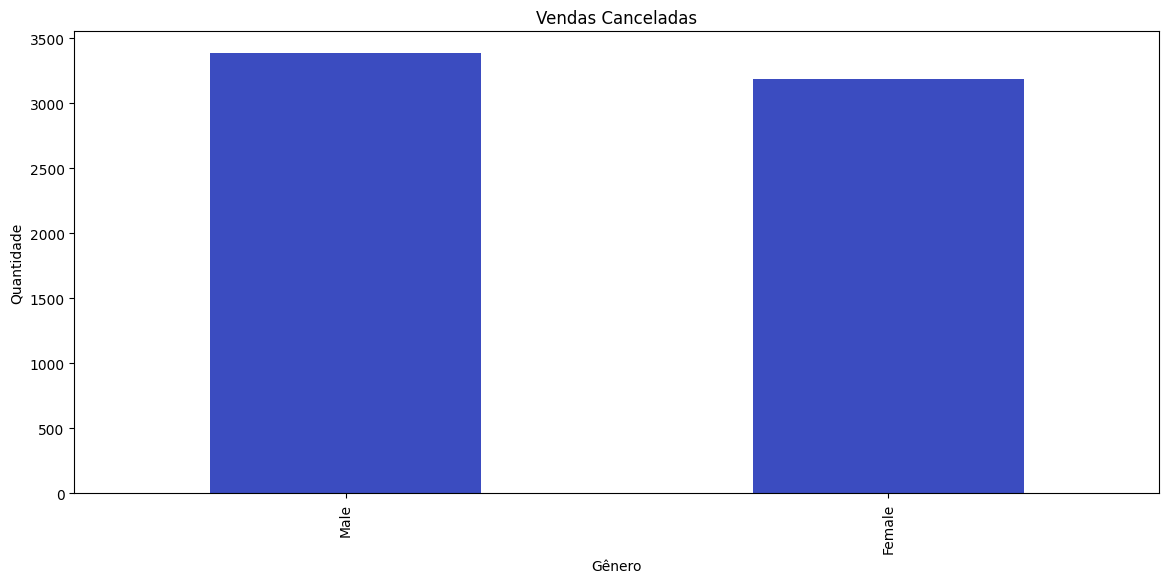

In [8]:
df_cancel["Gender"].value_counts().plot(kind="bar", figsize=(14,6), cmap = "coolwarm")
plt.title("Vendas Canceladas")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")

In [9]:
df_cancel.head(1)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21


Text(0.5, 0, 'Método de Pagamento')

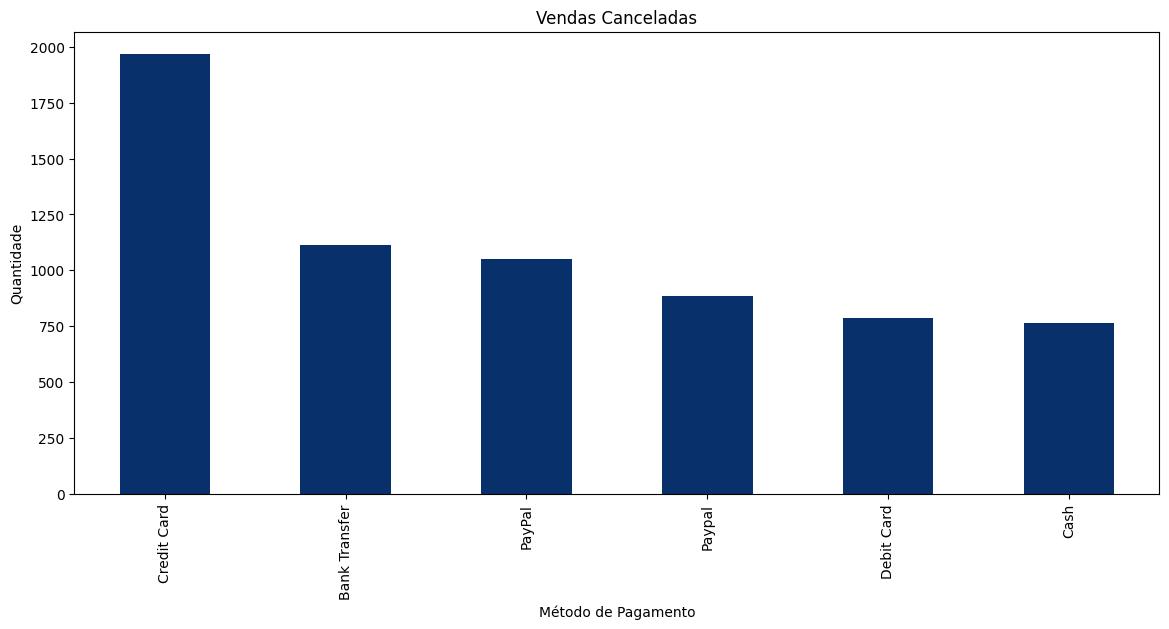

In [10]:
df_cancel["Payment Method"].value_counts().plot(kind="bar", figsize=(14,6), cmap="Blues_r")
plt.title("Vendas Canceladas")
plt.ylabel("Quantidade")
plt.xlabel("Método de Pagamento")

Aqui podemos notar uma diferença significativa entre as vendas canceladas de clientes que fazem parte do programa de fidelidade e os que não fazem..

Text(0.5, 0, 'Fidelidade')

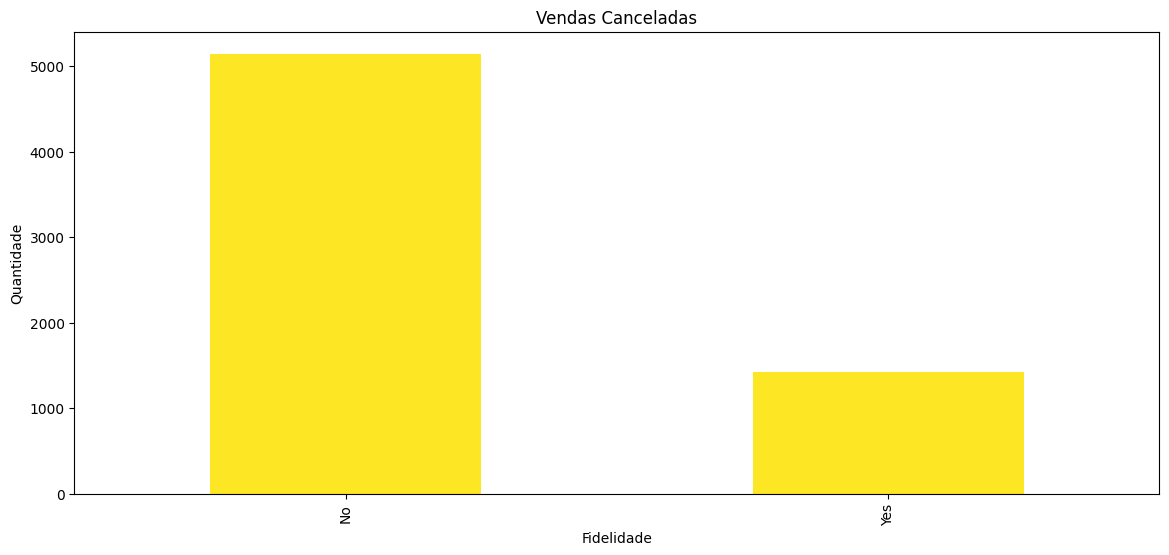

In [11]:
df_cancel["Loyalty Member"].value_counts().plot(kind="bar", figsize=(14,6), cmap = "viridis_r")
plt.title("Vendas Canceladas")
plt.ylabel("Quantidade")
plt.xlabel("Fidelidade")

Text(0.5, 0, 'Produtos')

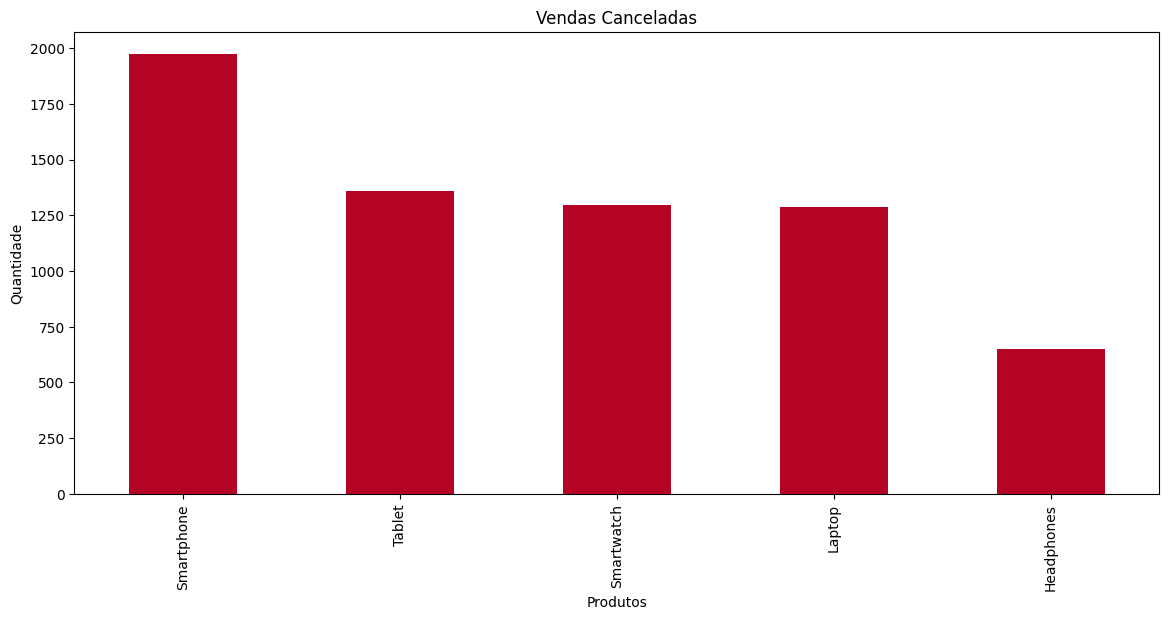

In [12]:
df_cancel["Product Type"].value_counts().plot(kind="bar", figsize=(14,6), cmap = "coolwarm_r")
plt.title("Vendas Canceladas")
plt.ylabel("Quantidade")
plt.xlabel("Produtos")

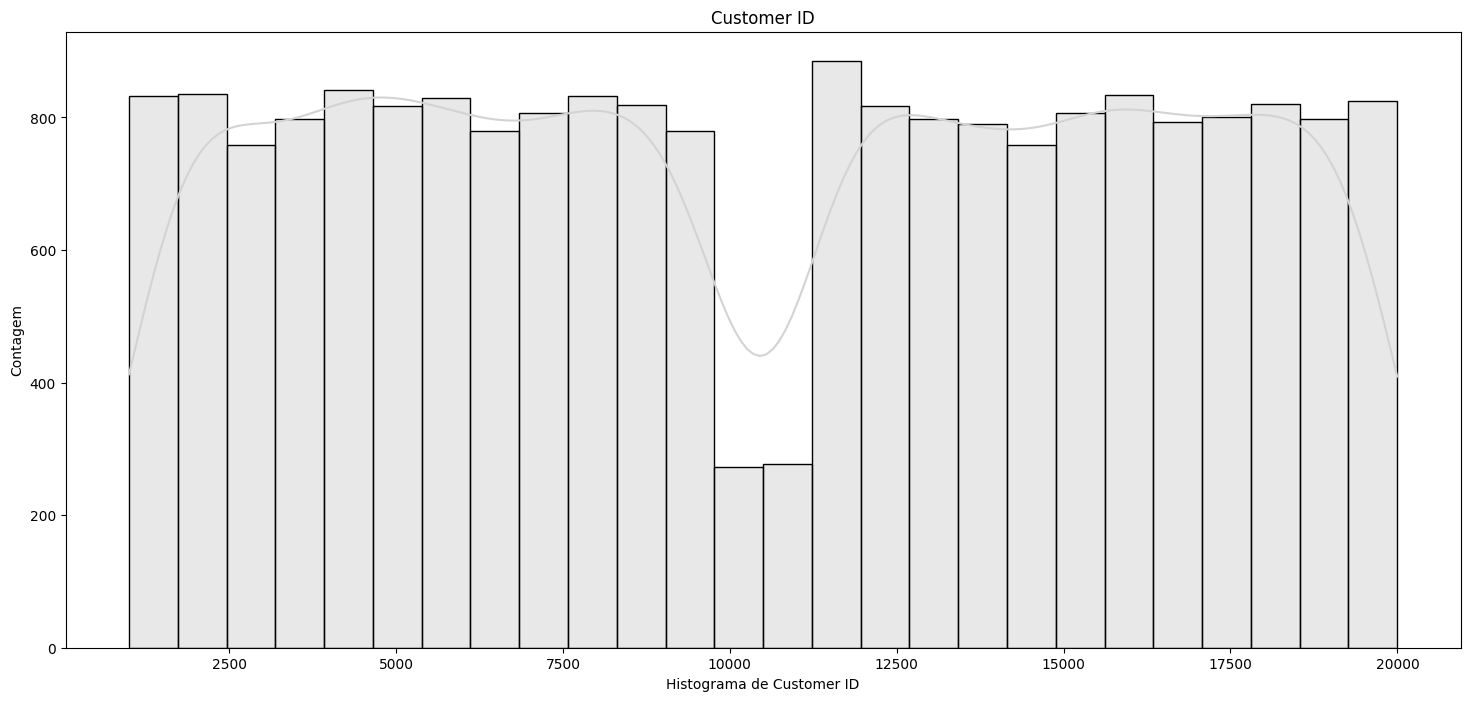

Resumo estatístico de Customer ID
        Customer ID
count  20000.000000
mean   10483.526550
std     5631.732525
min     1000.000000
25%     5478.000000
50%    10499.500000
75%    15504.000000
max    19998.000000


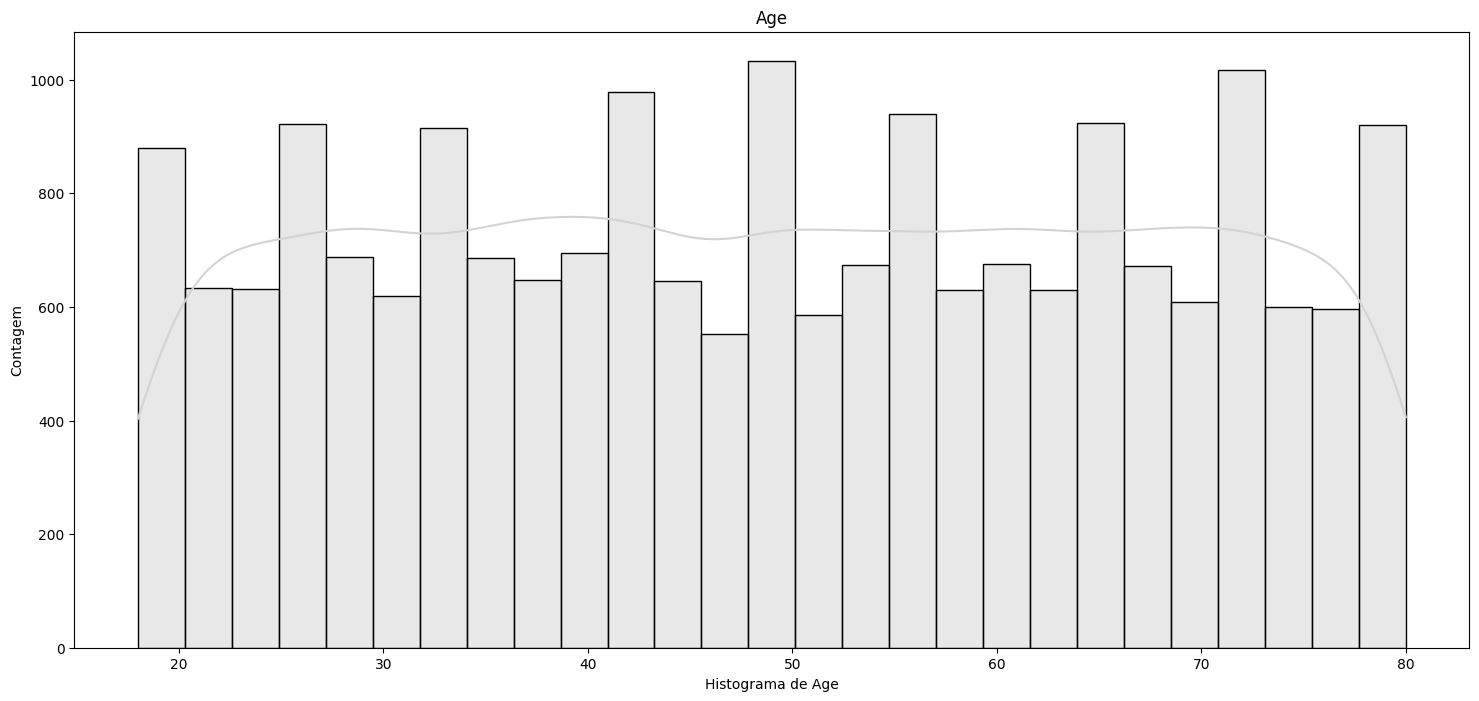

Resumo estatístico de Age
                Age
count  20000.000000
mean      48.994100
std       18.038745
min       18.000000
25%       33.000000
50%       49.000000
75%       65.000000
max       80.000000


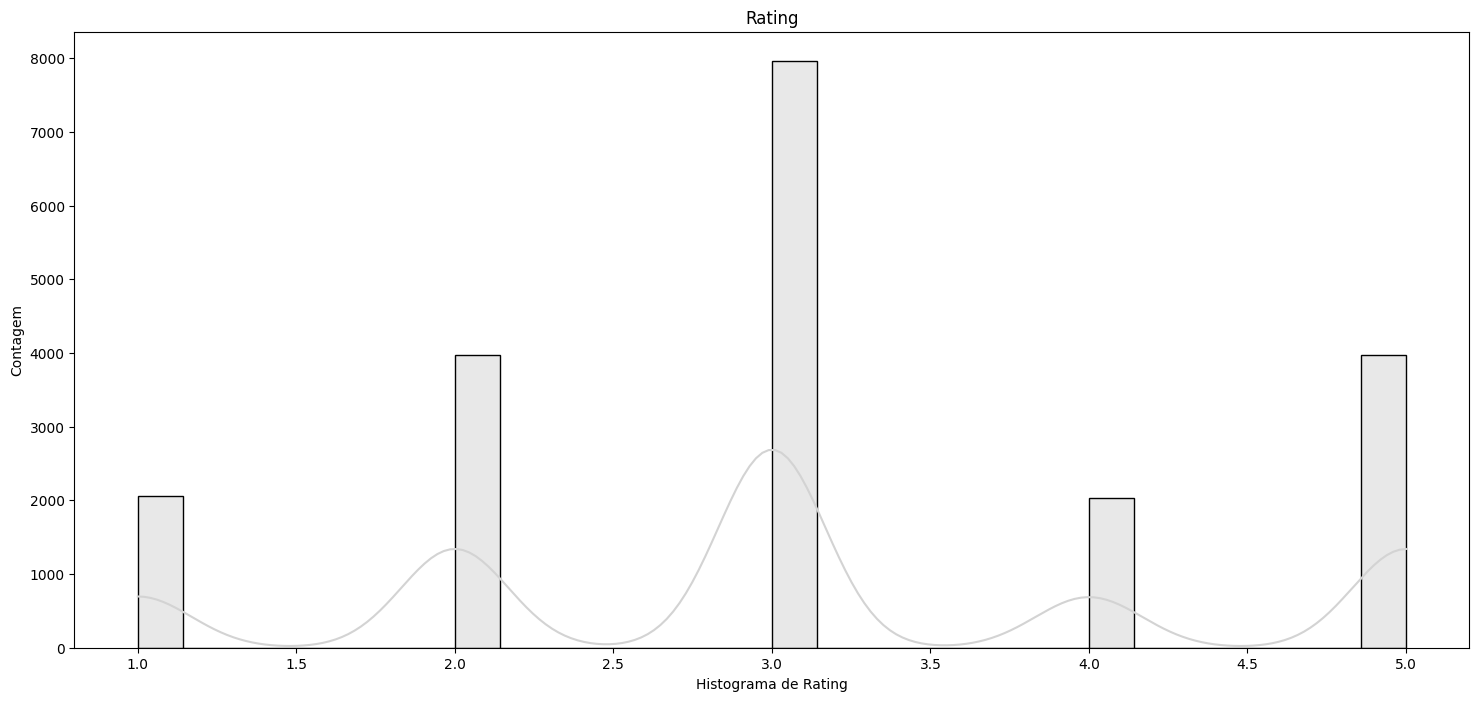

Resumo estatístico de Rating
             Rating
count  20000.000000
mean       3.093950
std        1.223764
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000


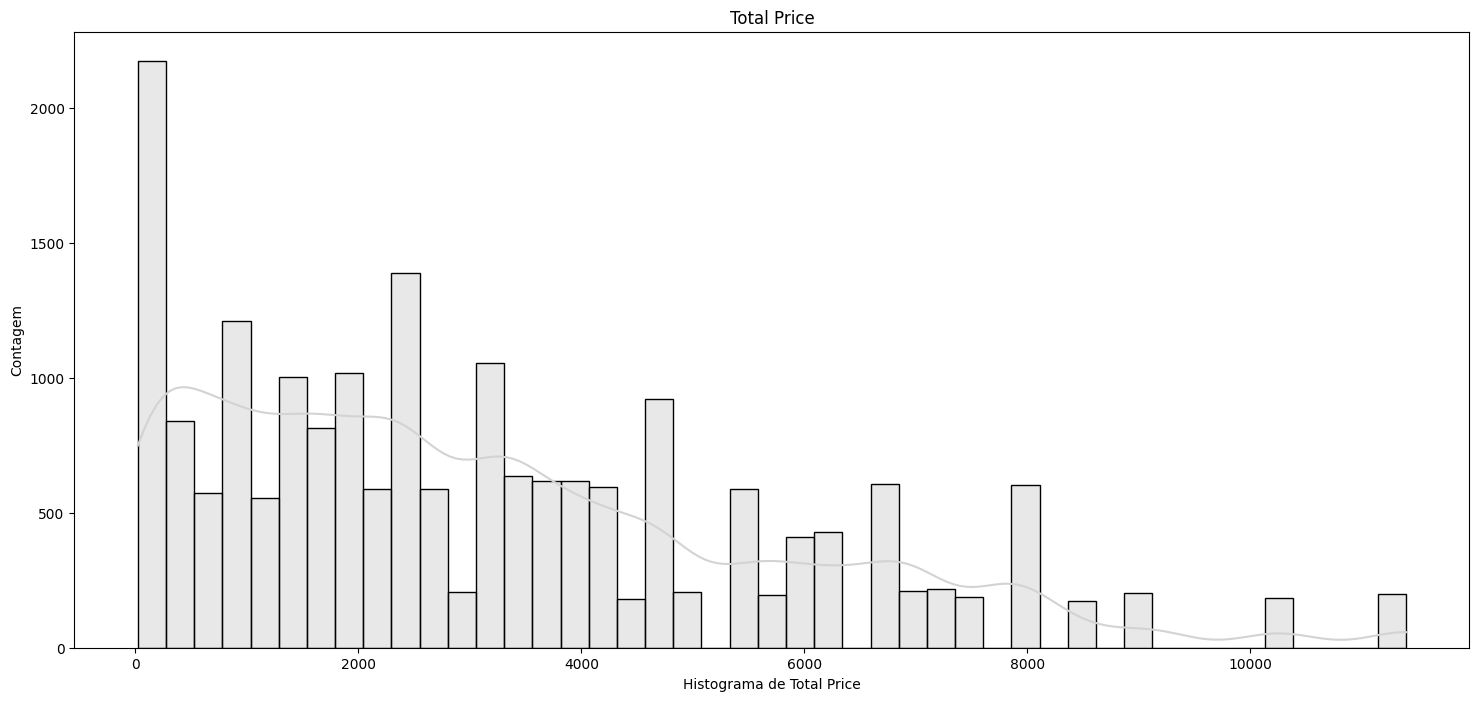

Resumo estatístico de Total Price
        Total Price
count  20000.000000
mean    3180.133419
std     2544.978675
min       20.750000
25%     1139.680000
50%     2534.490000
75%     4639.600000
max    11396.800000


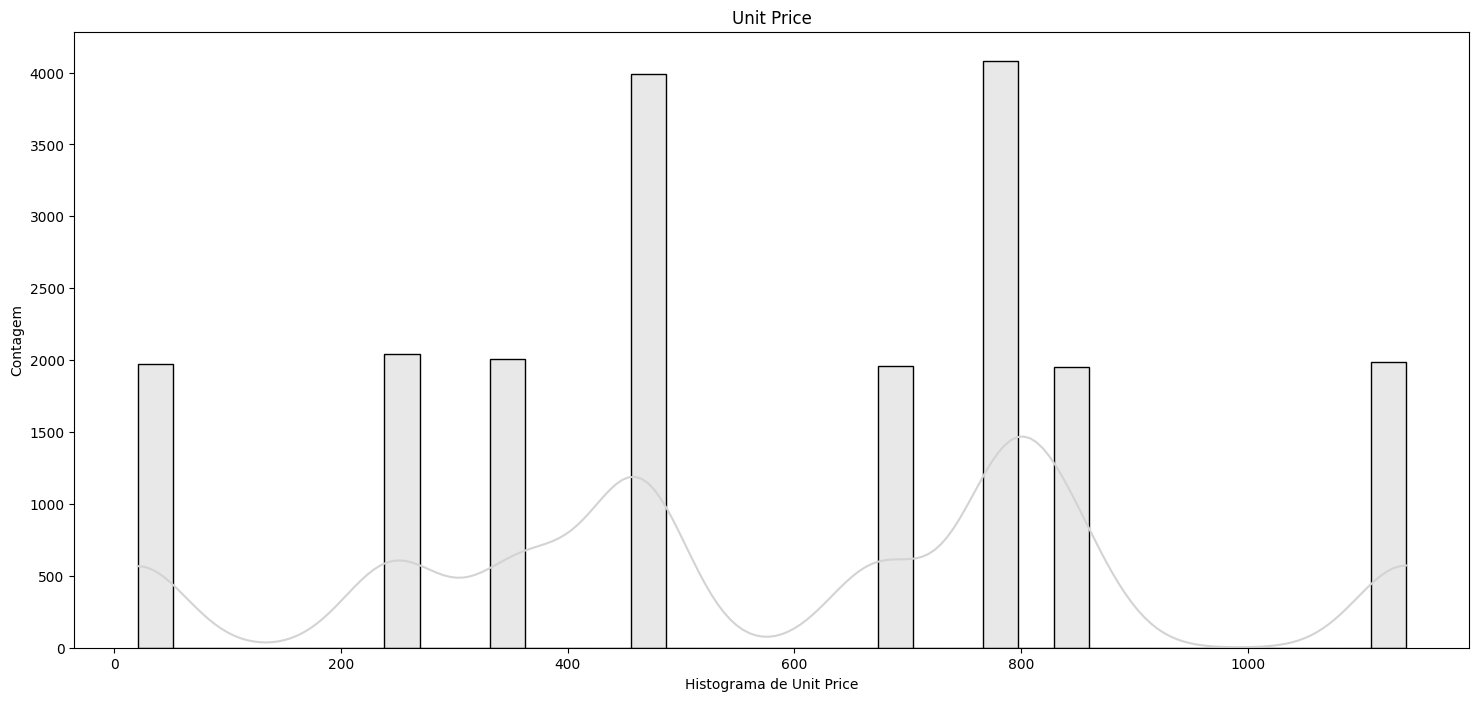

Resumo estatístico de Unit Price
         Unit Price
count  20000.000000
mean     578.631867
std      312.274076
min       20.750000
25%      361.180000
50%      463.960000
75%      791.190000
max     1139.680000


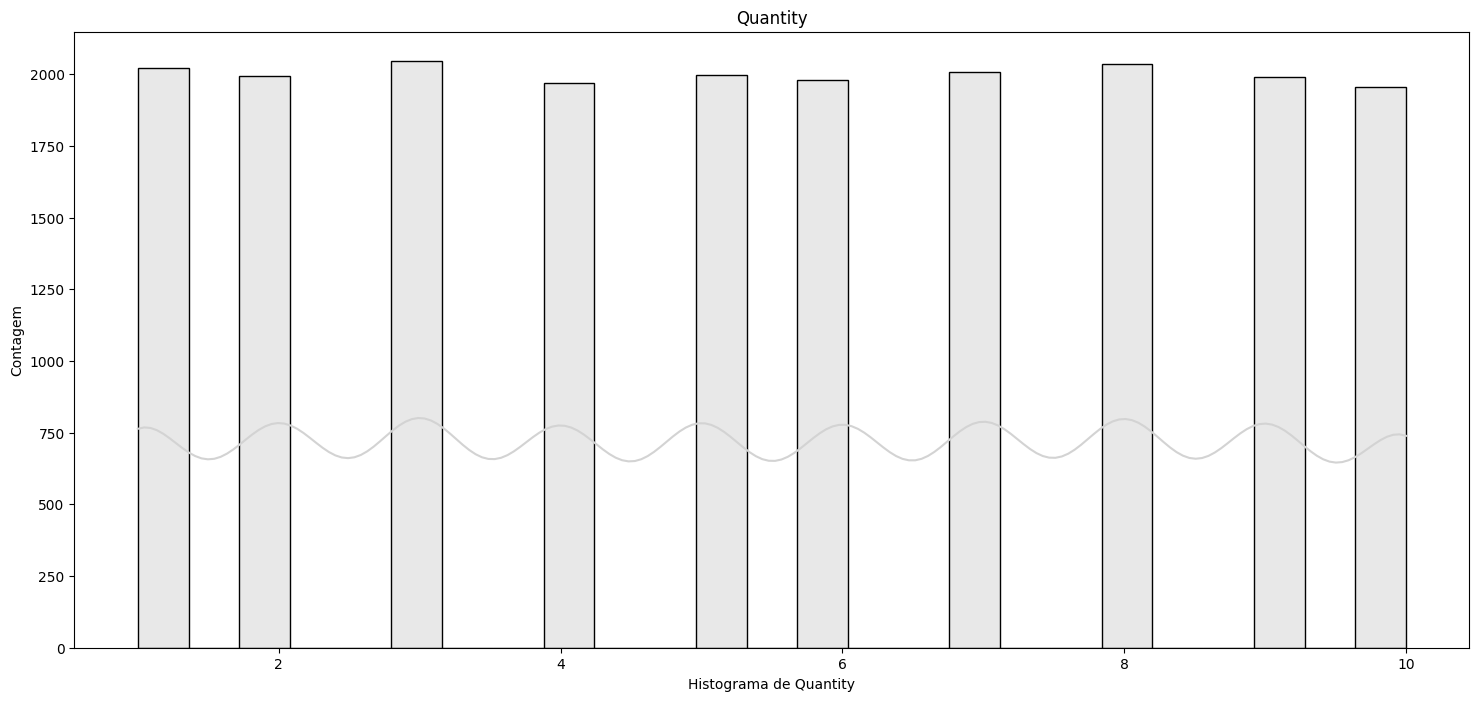

Resumo estatístico de Quantity
           Quantity
count  20000.000000
mean       5.485550
std        2.870854
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000


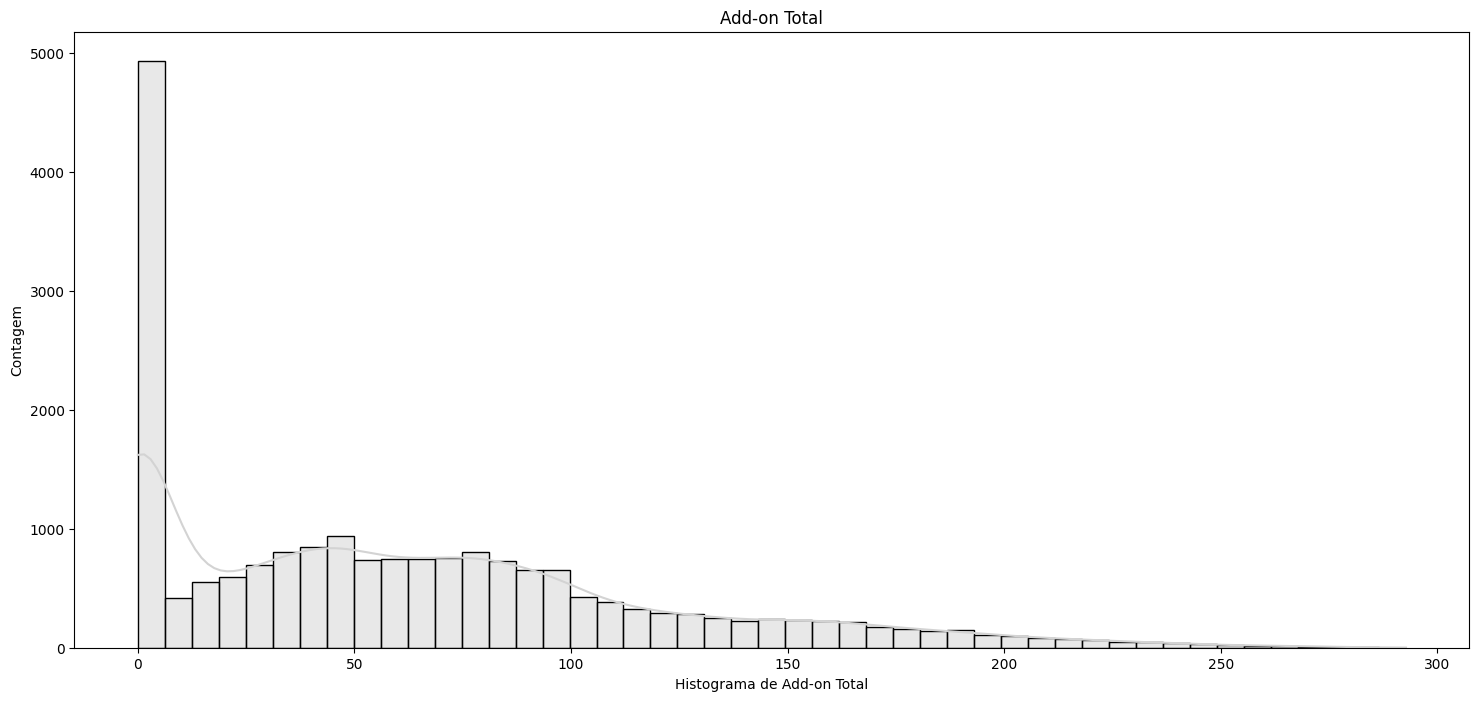

Resumo estatístico de Add-on Total
       Add-on Total
count  20000.000000
mean      62.244848
std       58.058431
min        0.000000
25%        7.615000
50%       51.700000
75%       93.842500
max      292.770000


In [13]:
for col in sales.columns:
    if sales[col].dtype == "int64" or sales[col].dtype == "float64":
        sns.histplot(x = col, data = sales, bins = "auto", kde = True, color = "lightgrey")
        plt.ylabel("Contagem")
        plt.xlabel(f"Histograma de {col}")
        plt.title(col)
        plt.show()

        print(f"Resumo estatístico de {col}")
        print(sales[[col]].describe())

### Início da preparação dos dados para implementação

In [14]:
df_compl = sales[sales["Order Status"] != "Cancelled"][["Customer ID", "Total Price", "Purchase Date", "Product Type"]]
df_compl

,Customer ID,Total Price,Purchase Date,Product Type
1,1000,741.09,2024-04-20,Tablet
2,1002,1855.84,2023-10-17,Laptop
3,1002,3164.76,2024-08-09,Smartphone
4,1003,41.50,2024-05-21,Smartphone
5,1004,83.00,2024-05-26,Smartphone
...,...,...,...,...
19991,19995,5394.56,2024-08-09,Laptop
19994,19996,3419.04,2024-04-20,Smartphone
19995,19996,6838.08,2024-06-15,Smartphone
19997,19996,1805.90,2024-08-26,Headphones


In [15]:
df_compl.to_csv("df_filtrado.csv", index=False)

In [16]:
df_compl = df_compl.copy()
df_compl["Purchase Date"] = pd.to_datetime(df_compl["Purchase Date"])
df_compl.head()

,Customer ID,Total Price,Purchase Date,Product Type
1,1000,741.09,2024-04-20,Tablet
2,1002,1855.84,2023-10-17,Laptop
3,1002,3164.76,2024-08-09,Smartphone
4,1003,41.50,2024-05-21,Smartphone
5,1004,83.00,2024-05-26,Smartphone


In [17]:
df_compl["Purchase Date"]

1       2024-04-20
2       2023-10-17
3       2024-08-09
4       2024-05-21
5       2024-05-26
           ...    
19991   2024-08-09
19994   2024-04-20
19995   2024-06-15
19997   2024-08-26
19999   2024-01-29
Name: Purchase Date, Length: 13432, dtype: datetime64[ns]

In [18]:
data_referencia = pd.Timestamp("2024-11-01")
data_referencia

Timestamp('2024-11-01 00:00:00')

In [19]:
rfm = df_compl.groupby("Customer ID").agg({
    "Purchase Date": lambda dates: (data_referencia - dates.max()).days,
    "Customer ID": "count",
    "Total Price": "sum"
})

In [20]:
rfm.head()

,Purchase Date,Customer ID,Total Price
Customer ID,,,
1000,195,1,741.09
1002,84,2,5020.60
1003,164,1,41.50
1004,159,1,83.00
1005,130,2,11779.11


In [21]:
rfm = rfm.copy()
rfm["Recencia"] = pd.qcut(rfm["Purchase Date"], q = 3, labels = False, duplicates = "drop")
rfm["Recencia"] = 2 - rfm["Recencia"]
rfm["Frequencia"] = pd.cut(rfm["Customer ID"], 2, labels = False, duplicates = "drop")
rfm["Monetizacao"] = pd.qcut(rfm["Total Price"], q = 3, labels = False, duplicates = "drop")
rfm["RFM"] = rfm["Recencia"].astype(str) +  rfm["Frequencia"].astype(str) +  rfm["Monetizacao"].astype(str)
rfm.head(n=10)

,Purchase Date,Customer ID,Total Price,Recencia,Frequencia,Monetizacao,RFM
Customer ID,,,,,,,
1000,195,1,741.09,1,0,0,100
1002,84,2,5020.60,2,0,1,201
1003,164,1,41.50,1,0,0,100
1004,159,1,83.00,1,0,0,100
1005,130,2,11779.11,1,0,2,102
1006,129,2,6645.94,1,0,2,102
1008,403,1,3379.32,0,0,1,001
1011,117,1,7911.90,2,0,2,202
1014,167,1,4747.14,1,0,1,101


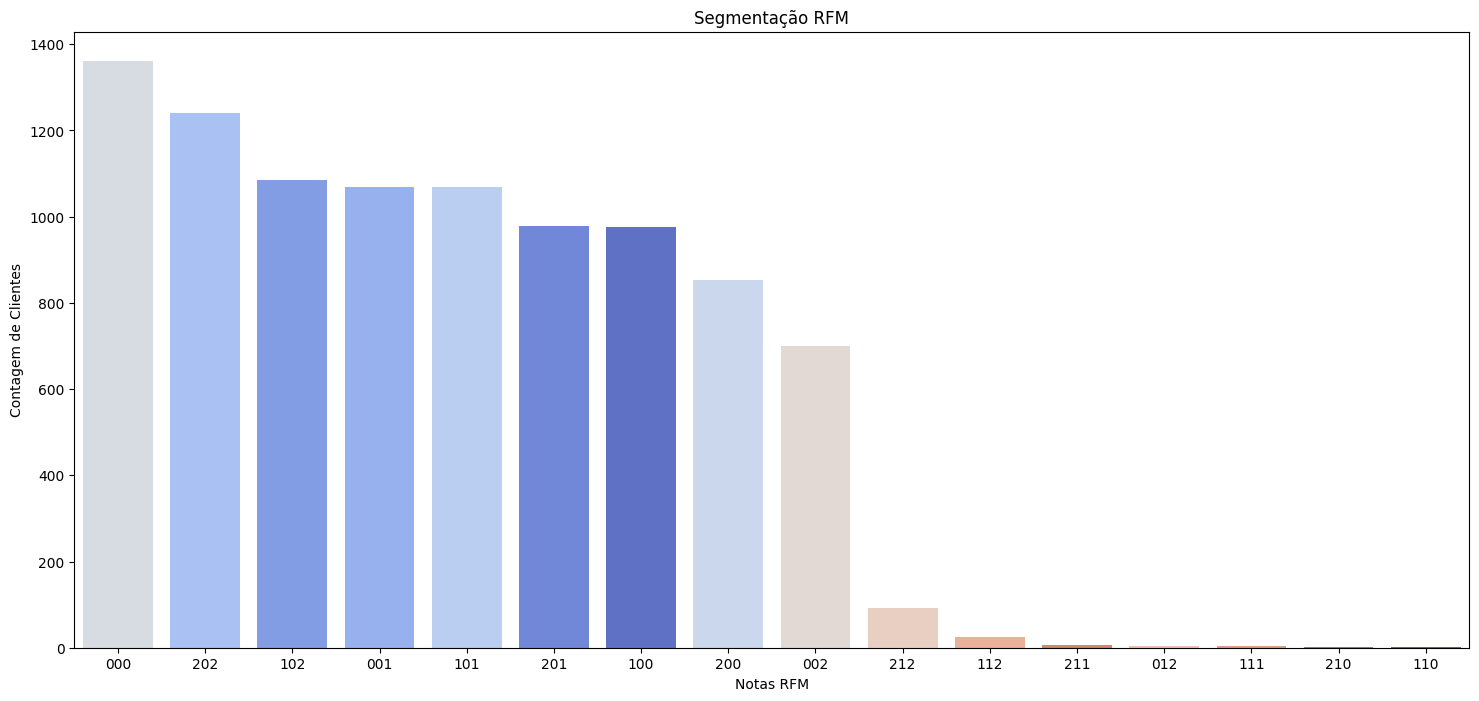

In [22]:
#Distribuição das Notas
sns.countplot(data = rfm, x = "RFM", hue = "RFM", order = rfm["RFM"].value_counts().index, palette = "coolwarm")
plt.xlabel("Notas RFM")
plt.ylabel("Contagem de Clientes")
plt.title("Segmentação RFM")
plt.show()

In [28]:
#Mapeamento da segmentação
mapeamento = {
    "000": "Campanhas Baixo Custo", # Baixa frequência, recência e baixo valor
    "212": "Super Fãs", # Compram frequentemente com alto valor
    "202": "Campeões", # Compraram recentemente com alto valor mas não compram há algum tempo
    "102":"Potenciais Gastadores", # Média recência, baixa frequência e alto valor
    "112": "Fiéis", # Média recência, média frequência e alto valor
    "001": "Promissores", # Baixa recência, frequência e médio valor
    "002": "Gastadores Ocasionais", # Baixa recência e frequência mas alto valor
    "101": "Promissores Ocasionais", # Média recência, valor médio e baixa frequência
    "111": "Promissores", # Média recência, frequência e valor monetário
    "201": "Novos Entusiastas", # Compraram recentemente, com valor médio e baixa frequência
    "100": "Recentes Econômicos ", # Recência média, com baixa frequência e valor
    "200": "Novos Econômicos", # Clientes novos, valor e frequência baixos
    "211": "Engajados Promissores", # Compraram recentemente com frequência, valor médio
    "210": "Engajados Econômicos", # Compraram recentemente com frequência, valor baixo
    "012": "Ex-Campeões", # Frequência e valor altos mais baixa recência
    "110":"Valor Baixo"    # Média recência, alta frequência e valor baixo 
}

In [29]:
rfm["segmentacao"] = rfm["RFM"].map(mapeamento)

In [30]:
rfm.isnull().sum()

Purchase Date    0
Customer ID      0
Total Price      0
Recencia         0
Frequencia       0
Monetizacao      0
RFM              0
segmentacao      0
dtype: int64

#### Distribuição Final dos Segmentos e persistência dos dados em disco para posterior visualização

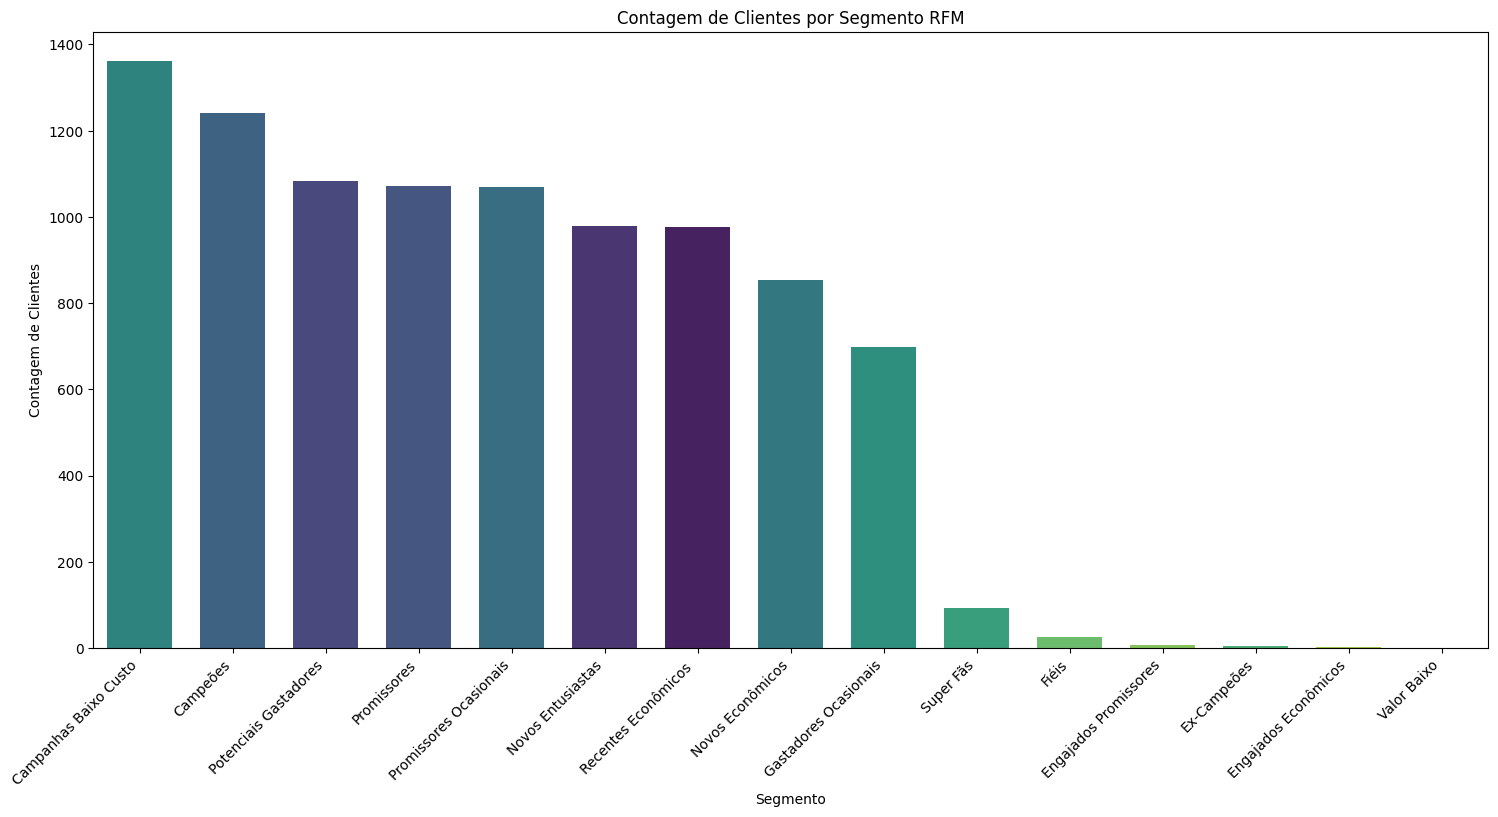

In [31]:
sns.countplot(data=rfm, x= "segmentacao", hue= "segmentacao", order=rfm['segmentacao'].value_counts().index, width = 0.7, palette="viridis")
plt.title('Contagem de Clientes por Segmento RFM')
plt.xlabel('Segmento')
plt.ylabel('Contagem de Clientes')
plt.xticks(rotation=45, ha = "right")
plt.show()

In [33]:
rfm.head()

,Purchase Date,Customer ID,Total Price,Recencia,Frequencia,Monetizacao,RFM,segmentacao
Customer ID,,,,,,,,
1000,195,1,741.09,1,0,0,100,Recentes Econômicos
1002,84,2,5020.60,2,0,1,201,Novos Entusiastas
1003,164,1,41.50,1,0,0,100,Recentes Econômicos
1004,159,1,83.00,1,0,0,100,Recentes Econômicos
1005,130,2,11779.11,1,0,2,102,Potenciais Gastadores


In [32]:
#Persistência do arquivo csv para posterior utilização
#rfm.to_csv("Segmentacao.csv")